### HW 4 Ildar Nurgaliev: song text generator
on Russian and English languages

data files crawled from http://muzoton.ru/

The java crawler is in my github https://github.com/ILDAR9/musicinfo

In [1]:
!ls data

author.csv  genre.csv  musicinfo.csv  rap_text.csv  shanson_text.csv  text.csv


In [1]:
import itertools
import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore

In [91]:
import matplotlib
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
def read_csv(fname, col_names):
    return pd.read_csv('data/%s.csv' % fname,index_col=col_names[0], names=col_names, header=None, sep='\\')

/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [74]:
authors = read_csv('author', ['AUTHOR_ID','AUTHOR_NAME'])
authors[:3]

,AUTHOR_NAME
AUTHOR_ID,
105,1.5 кг отличного пюре
1,1.klas
1020,12 stones


In [81]:
genres = read_csv('genre', ['GENRE_ID','GENRE_NAME'])
genr_ids = [1,2,3,4,5,6,7,8,9,10,11,12]
genres

,GENRE_NAME
GENRE_ID,
8,9maya
11,jokes
12,jokes/kvn
6,kidsong
5,kinosong
9,newyear
2,pop
1,rap
3,rock


In [76]:
songs = read_csv('musicinfo', ['MINFO_ID', 'MINFO_NAME', 'MINFO_TEXT', 'MINFO_AUTHOR_ID', 'MINFO_GENRE_ID', 'MINFO_URL'])
songs[1000:1003]

,MINFO_NAME,MINFO_TEXT,MINFO_AUTHOR_ID,MINFO_GENRE_ID,MINFO_URL
MINFO_ID,,,,,
983,Fool In Love,"Mama, I found a man Who loves me and understan...",354.0,2,http://muzoton.ru/2052-rihanna-fool-in-love.html
984,Red Lipstick,"Red lipstick, all on the paper Let me take a h...",354.0,2,http://muzoton.ru/2053-rihanna-red-lipstick.html
985,Rude Boy,Come here rude boy Boy can you get it up Come ...,354.0,2,http://muzoton.ru/9-rihanna-rude-boy.html


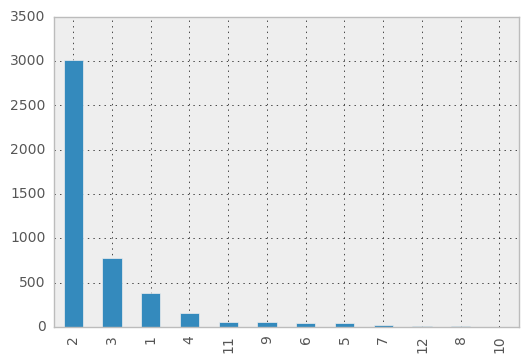

In [80]:
counts = songs['MINFO_GENRE_ID'].value_counts()
counts.plot(kind='bar')
del counts

In [2]:
from langdetect import detect
import re
# rap_text shanson_text
def get_text(fname='rap_text'):
    logging.info("read %s" % fname)
    with open('data/%s.csv' % fname, 'r') as f:
        for row in f:
            row = row.strip()
            if detect(row[:20]) == 'ru':
                t = re.sub('[a-zA-Z,…\-\?!"#$%()*,./\\<>=\n–—@\'0-9:;«»\[\]êí’`”“]', ' ', row.lower())
                t = re.sub(' +', ' ', t)
                yield re.sub( '\s+', ' ', t ).strip()
    
frm = 50

for x in enumerate(itertools.islice(get_text(), frm, frm+2), frm):
    print(x)

INFO : read rap_text


(50, 'с легким но колким порывом ветра преодолев сырые подземные километры по светлым станциям и холодным туннелям лови метрополитен мэйл шикарное царство размахом поражающее за копейки приглашает всех желающих куда то спешащих и просто гуляющих бодрых с утра и вечерами засыпающих опаздывающих и уже опоздавших местных шарюших и приезжих от своих отставших и врядли я что то при украшу если просто скажу это все наше ну и как сами видете прикиньте ловите вам подарок от души дорогие жители и тусуитесь там суетиться любуитесь но будьте бдительны и не сорите от края платформы отойдите повышенная опасность вся фигня вы помните мое любимое московское метро вот оно правильно тема про него быстро удобно надежно всегда тепло для нас бесплатно для вас совсем не дорого и я тебе сочувствую если ты не удостоен видеть этой небесной красоты с легким но колким порывом ветра преодолев сырые подземные километры кстати вот сейчас я хотел бы обратиться послушайте уважаемый гости столицы типа жаждущие культу

In [6]:
# get count of songs
print(sum(1 for _ in get_text()))

INFO : read rap_text


255


### Develop a Small LSTM Recurrent Neural Network

In [3]:
import numpy
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32,lib.cnmem=1"
import theano
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

Using gpu device 0: GeForce GTX 980 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)
Using TensorFlow backend.


In [4]:
!ls -l

total 47260
-rw-r--r-- 1 ildar ildar  153714 Nov 23 10:07 alice.txt
drwxrwxr-x 2 ildar ildar    4096 Dec  1 13:41 data
-rw-rw-r-- 1 ildar ildar   55907 Dec 11 23:38 hw4.ipynb
drwxrwxr-x 2 ildar ildar    4096 Nov 30 18:12 old
drwxrwxr-x 2 ildar ildar    4096 Dec 11 15:05 rap2_2_gen
drwxrwxr-x 2 ildar ildar    4096 Dec  7 17:30 rap2_generator
drwxrwxr-x 2 ildar ildar    4096 Dec 11 15:04 rap3_generator
drwxrwxr-x 2 ildar ildar    4096 Dec  1 13:43 rap_generator
drwxrwxr-x 2 ildar ildar    4096 Dec 11 16:26 shanson2_generator
drwxrwxr-x 2 ildar ildar    4096 Dec  7 17:30 shanson_generator
-rw-rw-r-- 1 ildar ildar   19314 Dec  9 01:14 Text generation.ipynb
-rw-rw-r-- 1 ildar ildar 9622640 Dec 11 16:10 weights-2_layer-rap4-00-2.7629.hdf5
-rw-rw-r-- 1 ildar ildar 9622640 Dec 11 17:19 weights-2_layer-rap4-01-2.3903.hdf5
-rw-rw-r-- 1 ildar ildar 9622640 Dec 11 18:30 weights-2_layer-rap4-02-2.2072.hdf5
-rw-rw-r-- 1 ildar ildar 9622640 Dec 11 19:43 weights-2_layer-rap4-03-2.0961.hdf5
-rw-rw-r-- 

Next, we need to load the ASCII text for the book into memory and convert all of the characters to lowercase to reduce the vocabulary that the network must learn.

In [5]:
# load ascii text and covert to lowercase
raw_text = ' '.join(get_text())

INFO : read rap_text


Now that the book is loaded, we must prepare the data for modeling by the neural network. We cannot model the characters directly, instead we must convert the characters to integers.

We can do this easily by first creating a set of all of the distinct characters in the book, then creating a map of each character to a unique integer.

In [6]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [7]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  520009
Total Vocab:  34


In [11]:
print(chars)

[' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']


We now need to define the training data for the network. There is a lot of flexibility in how you choose to break up the text and expose it to the network during training.

Each training pattern of the network is comprised of 100 time steps of one character (X) followed by one character output (y). When creating these sequences, we slide this window along the whole book one character at a time, allowing each character a chance to be learned from the 100 characters that preceded it (except the first 100 characters of course).

In [8]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  519909


Finally, we need to convert the output patterns (single characters converted to integers) into a one hot encoding. This is so that we can configure the network to predict the probability of each of the 47 different characters in the vocabulary (an easier representation) rather than trying to force it to predict precisely the next character. Each y value is converted into a sparse vector with a length of 47, full of zeros except with a 1 in the column for the letter (integer) that the pattern represents.

In [9]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize 
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

We can now define our LSTM model. Here we define a single hidden LSTM layer with 256 memory units. The network uses dropout with a probability of 20. The output layer is a Dense layer using the softmax activation function to output a probability prediction for each of the 47 characters between 0 and 1.

In [10]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

The network is slow to train (about 300 seconds per epoch on an Nvidia K520 GPU). Because of the slowness and because of our optimization requirements, we will use model checkpointing to record all of the network weights to file each time an improvement in loss is observed at the end of the epoch. We will use the best set of weights (lowest loss) to instantiate our generative model in the next section.

In [11]:
# define the checkpoint
filepath="weights-2_layer-rap4-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

We can now fit our model to the data. Here we use a modest number of 20 epochs and a large batch size of 128 patterns.

In [ ]:
model.fit(X, y, nb_epoch=30, batch_size=64, callbacks=callbacks_list)

Epoch 1/30
  8512/526048 [..............................] - ETA: 3874s - loss: 3.0822

### Generating Text with an LSTM Network

In [12]:
# load the network weights
# filename = "weights-2_layer-rap4-00-2.7629.hdf5"
# filename = "weights-2_layer-rap4-03-2.0961.hdf5"
filename = "weights-2_layer-rap4-04-2.0216.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

### Continue study model

In [ ]:
model.fit(X, y, nb_epoch=1, batch_size=64, callbacks=callbacks_list)

Also, when preparing the mapping of unique characters to integers, we must also create a reverse mapping that we can use to convert the integers back to characters so that we can understand the predictions.

In [34]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [19]:
pat = []
test = """
Сворачивай дела, старый
Три часа до самолета
Виза, паспорта готовы
Вот они - новые
Словно родившись заново
С полными кэша карманами
Последние минуты в Москве
"""
t = re.sub('[a-zA-Z,…\-?!"#$%()*,\n/\\<>=–—\'0-9:@;«»\[\]]', '', test.lower() ).strip()[:100]
for x in t:
    pat.append(char_to_int[x])
print(pat, "\n",len(pat))

[18, 3, 15, 17, 1, 24, 9, 3, 1, 10, 0, 5, 6, 12, 1, 0, 18, 19, 1, 17, 28, 10, 19, 17, 9, 0, 24, 1, 18, 1, 0, 5, 15, 0, 18, 1, 13, 15, 12, 6, 19, 1, 3, 9, 8, 1, 0, 16, 1, 18, 16, 15, 17, 19, 1, 0, 4, 15, 19, 15, 3, 28, 3, 15, 19, 0, 15, 14, 9, 0, 0, 14, 15, 3, 28, 6, 18, 12, 15, 3, 14, 15, 0, 17, 15, 5, 9, 3, 25, 9, 18, 29, 0, 8, 1, 14, 15, 3, 15, 18] 
 100


Finally, we need to actually make predictions.

The simplest way to use the Keras LSTM model to make predictions is to first start off with a seed sequence as input, generate the next character then update the seed sequence to add the generated character on the end and trim off the first character. This process is repeated for as long as we want to predict new characters (e.g. a sequence of 1,000 characters in length).

We can pick a random input pattern as our seed sequence, then print generated characters as we generate them.

In [57]:
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
print(start)
pattern = dataX[start]
# pattern = list(pat)
import sys
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(300):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nDone.")

150201
Seed:
" одета но скоро ляжет опять белый снег над игривой листвой но лишь в доме твоём меня всегда ждёт моё  "
сорни не поддолить со мной и постоянно не понять со мной и постоянно не понять со мной и не понять со мной и не понять ты меня не стоишь ты меня не стоишь ты меня не стоишь ты меня не стоишь ты меня не стоишь ты меня не стоишь ты меня не стоишь ты меня не стоишь ты меня не стоишь ты меня не стоишь т
Done.
